In [124]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
df = pd.read_csv('spam.csv', encoding="latin-1")

In [126]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1410,ham,Pls speak to that customer machan.,NaN,NaN,NaN
1166,ham,I am not having her number sir,NaN,NaN,NaN
838,spam,We tried to contact you re our offer of New Vi...,NaN,NaN,NaN
3673,spam,You have won a Nokia 7250i. This is what you g...,NaN,NaN,NaN
723,ham,Ya even those cookies have jelly on them,NaN,NaN,NaN


In [127]:
df.shape

(5572, 5)

In [128]:
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [129]:
df.rename(columns={'v1':"target", 'v2':"text"}, inplace=True)

In [130]:
encoder = LabelEncoder()

In [131]:
df['target'] = encoder.fit_transform(df['target'])

In [132]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [133]:
df.duplicated().sum()

403

In [134]:
df = df.drop_duplicates(keep="first")

#EDA

In [135]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

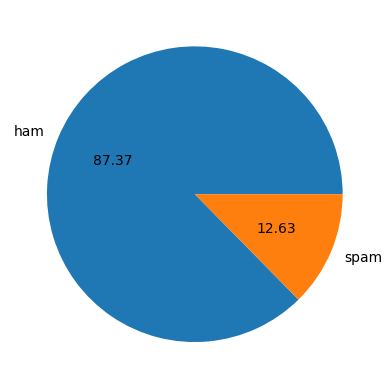

In [136]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%.2f")
plt.show()

In [137]:
df['num_characters'] = df['text'].apply(len)

In [138]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [139]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [140]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [141]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [142]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [143]:
ps = PorterStemmer()
def transform_Text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i);
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y);

In [144]:
transform_Text("Hi how are you? ?@ ")

'hi'

In [145]:
df['transformed_text'] = df['text'].apply(transform_Text)

In [146]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [147]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

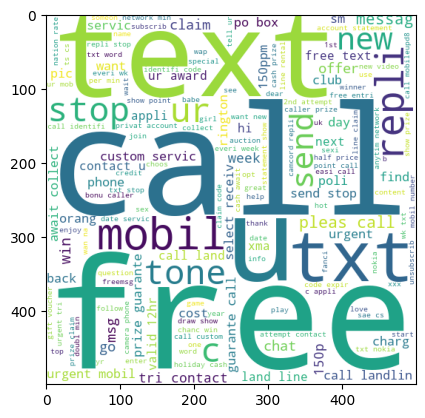

In [148]:
plt.imshow(spam_wc.to_image())

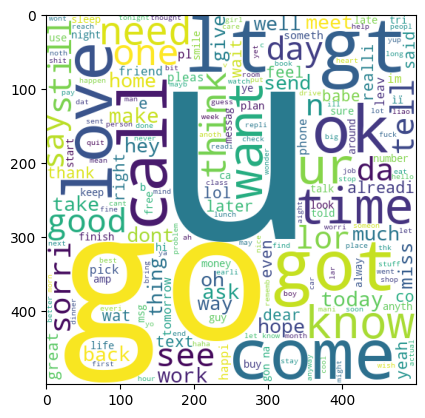

In [149]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc.to_image())

Model Building

In [150]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [151]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [152]:
y = df['target'].values

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, random_state=2, test_size=0.2
)

In [154]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [155]:
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [156]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [157]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
